## 3.2.4 Models of Friction

The three types of models for the frictional forces are:

\begin{equation}
    F^{(\text{static})}_f \leq -\mu_{s}N, \quad F^{(\text{kinetic})}_f = -\mu_k N \frac{v}{|v|}, \quad F^{(\text{viscous})}_f = -bv
\end{equation}

where $N$ is normal force and $\mu$ and $b$ are parameters.

We want to extend the harmonic oscillator codes to include frictional forces. So, let's import the rk4 method and include the code for our oscillator models again.

In [45]:
# Import the rk4 method from a different file
from RungeKutta.rk4Algo import dsbRK4
import matplotlib.pyplot as plt

### Question 1

a. For the simluation with static plus kinetic friction, each time the oscillation has v = 0 you need to check that the restoring force exceeds the static frictional force. If not, the oscillation must end at that instant. Check that your simluation terminates at nonzero $x$ values.

b. For your simluations with viscous friction, investigate the qualitative changes that occur for increasing $b$ values:

\begin{align*}
    &\text{Underdamped}: \quad b < 2m\omega_0 \quad \text{Oscillate within decaying envelope} \\
    &\text{Critically Damped:} \quad b = 2m\omega_0 \quad \text{Nonoscillatory, finite decay time} \\
    &\text{Overdamped:} \quad b > 2m\omega_0 \quad \text{Nonoscillatory, infinite decay time}
\end{align*}

In [46]:
import numpy as np

def friction(t, y):
    """
    Specifies the ODE to be solved by the RK4 function. This method specifies the multidimensional derivatives of the system.This function models all three different types of friction from the text. The treatment of static friction requires a bit more effort than models previously worked on. Since static friction only occurs when v=0 and is an inequality that cancels out the forces causing the motion, we can't just set it to be a number. Instead, static friction is implemented by checking first to see if the system is moving (i.e. v=0) and then seeing if the spring force overcomes the static friction force. If spring is stronger than static friction, then we continue to move under the influence of kinetic and viscous friction. If it's weaker, then we stop the entire motion by setting the differential equations to 0.

    Parameters
    ----------
    t : int or float
        The time values that are iterated through
    y : int or float
        The function values that are iterated through
    g : float
        Sets the gamma value in the Duffing equation
    Returns
    -------
    The velocities of the particular coordinates of interest.
    """
    #creates an array of velocities to store the system of First order ODEs
    v = np.empty([y.size])
    ## This is where the system of ODEs would go. You would have them written as v[0], v[1], ...

    #We set epsilon to be the number to check the velocity of the object.
    epsilon = 0.001

    #Checking the condition that the spring force is overcoming the static friction force and whether the system is at rest
    overcoming_Fs = k*y[0] > mu_s*N
    moving = abs(y[1]) > epsilon

    if not moving:

        if not overcoming_Fs:
            v[0] = 0
            v[1] = 0
        else:
            #I needed this extra bit in the for loop because the kinetic friction term gave divide by zero if I set the initial velocity to be 0
            v[0] = y[1]
            v[1] = -(w0*w0)*y[0] - b*y[1]

    else:
        v[0] = y[1]
        v[1] = (-k*y[0]-mu_k*N*(y[1]/abs(y[1])) - b*y[1])/m

    return v

The code above allows for the inspection of friction forces. Let's consider a system where we have these unchanging conditions:


\begin{align*}
    \text{Spring Constant: }& k = 10 \text{ N/m}\\
    \text{Mass: }& m=2 \text{ kg}\\
    \text{Angular Frequency: }& \omega_0 = \sqrt{\frac{k}{m}}\\
    \text{Normal Force: }& n = 20 \text{ N}\\
\end{align*}



In [47]:
k = 10
m = 2
w0 = np.sqrt(k/m)
N = 20

Let's first test the models for static and kinetic friction. For this, the system will exhibit
\begin{align*}
    \text{Static and Kinetic Friction: }& \mu_s = 0.9, \quad \mu_k = 0.6\\
    \text{Viscousity Constant: }& b = 0\\
\end{align*}
The coefficients of static and kinetic friction were chosen to simulate the combination of rubber and dry asphalt based on https://www.engineeringtoolbox.com/friction-coefficients-d_778.html.

In [48]:
mu_s = 0.9
mu_k = 0.6
b =  0

speed_20 = dsbRK4([10,20], friction, 2, 800, 1/100)
speed_10 = dsbRK4([10,10], friction, 2, 800, 1/100)

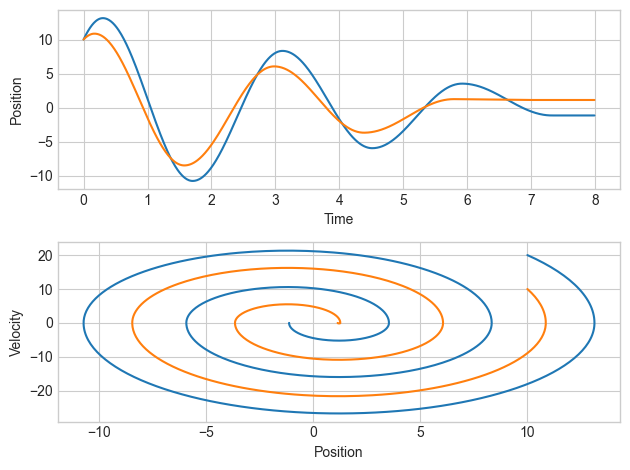

In [49]:
plt.rcParams["figure.autolayout"] = True
plt.style.use('seaborn-v0_8-whitegrid')

fig, ax = plt.subplots(2,1)

ax[0].plot(speed_20[1], speed_20[0][0])
ax[0].plot(speed_10[1], speed_10[0][0])
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Position')

ax[1].plot(speed_20[0][0], speed_20[0][1])
ax[1].plot(speed_10[0][0], speed_10[0][1])
ax[1].set_xlabel('Position')
ax[1].set_ylabel('Velocity')
plt.show()

Notice the lose of energy as the oscillation continues because of the kinetic friction force. Similarly, the initial condition will affect how the long the oscillation take before being stopped by static friction. Finally, there certain point when the velocity becomes zero and the position is small enough were the restoring force from the spring can no longer overcome the static friction force and the motion ceases to progress.

Let's now look at the viscous friction force itself. Here, the static and kinetic friction forces will be set to zero and consider different conditions for possible viscous parameters $b$.

In [87]:
mu_s = mu_k = 0

b = 0.1*m*w0
under = dsbRK4([10,20], friction, 2, 3000, 1/100)

b = 2*m*w0
crit = dsbRK4([10,20], friction, 2, 3000, 1/100)

b = 3*m*w0
over = dsbRK4([10,20], friction, 2, 3000, 1/100)

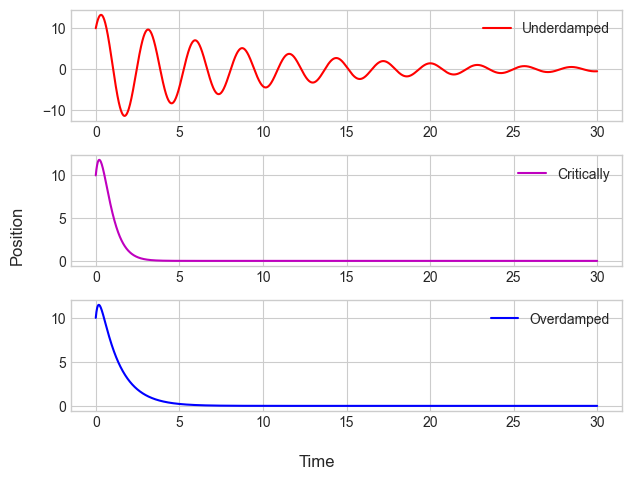

In [102]:
figure, axes = plt.subplots(3, 1)

axes[0].plot(under[1], under[0][0], 'r', label = 'Underdamped')
axes[0].legend()

axes[1].plot(crit[1], crit[0][0], 'm', label = 'Critically')
axes[1].legend()

axes[2].plot(over[1], over[0][0], 'b', label = 'Overdamped')
axes[2].legend()

figure.supxlabel('Time')
figure.supylabel('Position')
plt.show()

From the graphs above, the different regions of behavior can be seen:

1. For underdamped, the oscillator has an enveloping decrease in the amplitude.
2. For critically damped, the motion is nonoscillatory and takes a finite time to decay to equilibrium
3. For overdamped, the motion is also nonoscilatory but instead only asmptotically approaches equilibirum.